# Analysis
Similar to aggregate_results, but for either random links or correlated links using the number of parents from a causal case (e.g., quantile-threshold = 0.59). Produces correlation and random matrix plots.

# Main program

## Specifications

In [1]:
import sys, numpy as np

from utils.setup import SetupPCMCIAggregation
import utils.pcmci_aggregation as aggregation

# argv = ['-c', './nn_config/cfg_aggregate_results_for_numparents.yml']
argv = ['-c', './nn_config/cfg_aggregate_results_for_numparents_pearsonr.yml']

setup = SetupPCMCIAggregation(argv)


/work/bd1179/b309172/mambaforge/envs/causalnncam/lib/python3.8/site-packages/tigramite-5.0.1.5-py3.8.egg/tigramite/independence_tests/gpdc.py:27: UserWarning: [Errno 2] No such file or directory: '/work/bd1179/b309172/mambaforge/envs/causalnncam/lib/python3.8/site-packages/tigramite-5.0.1.5-py3.8.egg/tigramite/independence_tests/../../versions.py'
  warnings.warn(str(e))
/work/bd1179/b309172/mambaforge/envs/causalnncam/lib/python3.8/site-packages/tigramite-5.0.1.5-py3.8.egg/tigramite/independence_tests/gpdc_torch.py:33: UserWarning: No module named 'torch'
  warnings.warn(str(e))
/work/bd1179/b309172/mambaforge/envs/causalnncam/lib/python3.8/site-packages/tigramite-5.0.1.5-py3.8.egg/tigramite/plotting.py:26: UserWarning: [Errno 2] No such file or directory: '/work/bd1179/b309172/mambaforge/envs/causalnncam/lib/python3.8/site-packages/tigramite-5.0.1.5-py3.8.egg/tigramite/../versions.py'
  warnings.warn(str(e))


## Options

In [2]:
random         = False 
threshold_dict = False
num_parents    = True
masking        = False
save           = False

## Collect results

In [4]:
# collected_results, errors = aggregation.collect_results(setup)
collected_results, errors = aggregation.collect_results(setup, reuse=True)
print(aggregation.print_errors(errors))

Variable: tphystnd
SPCAM_Rasp_causal_links_3mth_pearsonr_v2/aggregate_pdf/tphystnd-3.64_pearsonr_2021_09_02_TRAIN_For_Nando exists; loading...

SPCAM_Rasp_causal_links_3mth_pearsonr_v2/aggregate_pdf/tphystnd-7.59_pearsonr_2021_09_02_TRAIN_For_Nando exists; loading...

SPCAM_Rasp_causal_links_3mth_pearsonr_v2/aggregate_pdf/tphystnd-14.36_pearsonr_2021_09_02_TRAIN_For_Nando exists; loading...

SPCAM_Rasp_causal_links_3mth_pearsonr_v2/aggregate_pdf/tphystnd-24.61_pearsonr_2021_09_02_TRAIN_For_Nando exists; loading...

SPCAM_Rasp_causal_links_3mth_pearsonr_v2/aggregate_pdf/tphystnd-38.27_pearsonr_2021_09_02_TRAIN_For_Nando exists; loading...

SPCAM_Rasp_causal_links_3mth_pearsonr_v2/aggregate_pdf/tphystnd-54.6_pearsonr_2021_09_02_TRAIN_For_Nando exists; loading...

SPCAM_Rasp_causal_links_3mth_pearsonr_v2/aggregate_pdf/tphystnd-72.01_pearsonr_2021_09_02_TRAIN_For_Nando exists; loading...

SPCAM_Rasp_causal_links_3mth_pearsonr_v2/aggregate_pdf/tphystnd-87.82_pearsonr_2021_09_02_TRAIN_For_Na

## Analyze collected results

In [5]:
if threshold_dict:
    # Thrs-optimized
    thrs_dict = setup.thrs_argv = ['-c', './nn_config/quantile_dicts/001_quantile_thresholds_mse-6.yml']
else:
    thrs_dict = threshold_dict

if random: 
    setup.independence_test = 'random'
else:
    setup.numparents_argv = ['-c', './nn_config/quantile_dicts/001_quantile-0.59_numparents.yml']


aggregated_results, var_names_parents = aggregation.aggregate_results_for_numparents(
    collected_results, setup, thresholds_dict=thrs_dict, random=random
)


In [6]:
def calc_mean_num_parents(aggregated_results):
    numparents = []
    tot_inputs = len(var_names_parents)
    for i, output in enumerate(aggregated_results.keys()):
        threshold = 'optimized' if threshold_dict else setup.thresholds[0]
        num_parents = aggregated_results[output][str(setup.pc_alphas[0])]['num_parents'][str(threshold)]
        numparents.append(num_parents)
        # print(f"{i} {output} num. parents: {num_parents}")
    numparents = np.array(numparents)
    print(f"Mean Num. of Parents is: {numparents.mean()} ({numparents.mean()/tot_inputs * 100.} %)\n")
    return numparents

## Plots

### Plot Outputs-Inputs metrics 

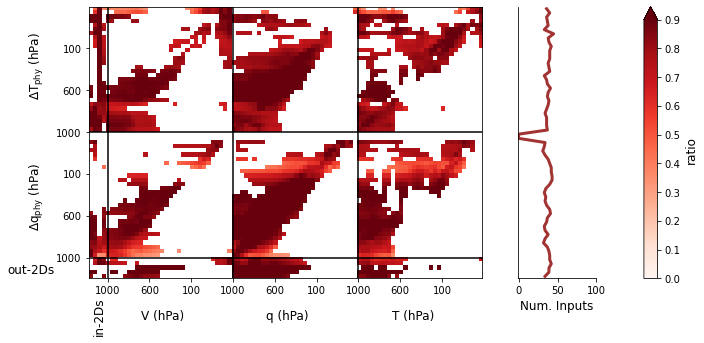

In [7]:
aggregation.plot_matrix_results(
    var_names_parents, 
    aggregated_results, 
    setup, 
    values='percentage',
    threshold_dict=threshold_dict,
    num_parents=num_parents,
    random=random,
    save=save,
    masking=masking,
    cmap='Reds',
)

In [8]:
numparents = calc_mean_num_parents(aggregated_results)

Mean Num. of Parents is: 36.353846153846156 (38.67430441898527 %)

